In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('pima-indians-diabetes-1.data',header=None)
values=data.values

In [3]:
my_model=LogisticRegression()
my_model2=DecisionTreeClassifier(criterion='entropy',max_depth=5)


In [4]:
prod_data=values[700:,]
prod_data.shape
values=values[:700,]
values.shape

(700, 9)

In [5]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=my_model2,n_estimators=51)
bgcl.fit(values[:,:-1],values[:,-1])
#bgcl.oob_score_     ### testing the ensemble against OOB
#bgcl.score(test_set , test_labels) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=51)

In [6]:
#In production any unseen new snapshot of data can be used for testing 
production_pred = bgcl.predict(prod_data[:,:-1])
production_pred


array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [7]:
acc=metrics.accuracy_score(prod_data[:,-1],production_pred)
acc*100

76.47058823529412

In [8]:
cr=metrics.classification_report(prod_data[:,-1],production_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        41
         1.0       0.74      0.63      0.68        27

    accuracy                           0.76        68
   macro avg       0.76      0.74      0.75        68
weighted avg       0.76      0.76      0.76        68



In [9]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(base_estimator=my_model2,n_estimators= 50)
abcl.fit(values[:,:-1],values[:,-1])
#abcl.score(test_set , test_labels)# use this if you have reserved any dataset for testing


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5))

In [10]:
y_pred_boost = abcl.predict(prod_data[:,:-1])
y_pred_boost

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [11]:
metrics.accuracy_score(prod_data[:,-1],y_pred_boost)

0.7794117647058824

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(values[:,:-1],values[:,-1])

GradientBoostingClassifier(n_estimators=51)

In [13]:
y_predict=gbcl.predict(prod_data[:,:-1])
metrics.accuracy_score(prod_data[:,-1],y_predict)

0.7647058823529411

In [14]:
cr=metrics.classification_report(prod_data[:,-1],y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        41
         1.0       0.74      0.63      0.68        27

    accuracy                           0.76        68
   macro avg       0.76      0.74      0.75        68
weighted avg       0.76      0.76      0.76        68



In [15]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 0.7416440831074979


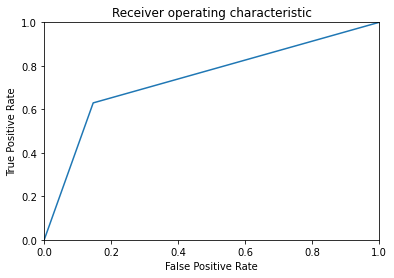

In [16]:
fpr,tpr, _ = roc_curve(prod_data[:,-1],production_pred)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()